In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#reading csv file
df = pd.read_csv('CBB_Listings.csv')
df.head()


,listing_id,listing_heading,listing_type,listing_url,listing_first_date,days_on_market,dealer_id,dealer_name,dealer_street,dealer_city,...,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,price_history_delimited,distance_to_dealer,location_score,listing_dropoff_date
0,f5b663d2-4896-11ef-a15b-8b4423f1ff08,1987 IROC Z 350 Auto T-Tops,Active,https://www.kijiji.ca/v-cars-trucks/edmonton/1...,7/22/2024 0:00,9,11152931,David T's Camaro & Firebird Auto Center,10611 201 St NW,Edmonton,...,0.0,RWD,5.7L V8 TBI,A,Gas,0,"2024-07-22,11500,230860",9.84,5,NaN
1,a9f565e6-4712-11ef-a23f-79dc25c5e601,NaN,Sold,https://www.redlinemotors.ca/vehicle-details/1...,7/20/2024 0:00,4,11131329,Redlinemotors.Ca,14421 Mark Messier Trail,Edmonton,...,0.0,RWD,5.2L V8,A,Gas,0,"2024-07-20,8700,48905",8.30,5,7/24/2024 0:00
2,03d18c58-253a-11ef-8f33-8905b4a2f000,1989 Cadillac DeVille Sedan FWD,Active,https://www.sweetheartmotor.com/cars/used/1989...,6/7/2024 0:00,54,11161704,Gateway Auto & Rv Sales & Financing Ltd,5404 Gateway Blvd NW,Edmonton,...,0.0,FWD,4.5L V8 DI,A,Gas,0,"2024-06-07,6000,174640",5.71,4,NaN
3,2d12630b-460e-11ee-89c4-e5b3161d4741,1989 Cadillac DeVille Sedan FWD,Active,https://www.sweetheartmotor.com/cars/used/1989...,8/28/2023 0:00,338,11128265,Credit Angels,5404 Gateway Blvd NW,Edmonton,...,0.0,FWD,4.5L V8 DI,A,Gas,4,"2023-08-28,4500,174640:2023-09-13,5900,174640:...",5.71,5,NaN
4,53a8e550-47cd-11ef-8587-f926ecb61035,1989 Camaro IROC 350 Auto T-Top,Active,https://www.kijiji.ca/v-cars-trucks/edmonton/1...,7/21/2024 0:00,10,11152931,David T's Camaro & Firebird Auto Center,10611 201 St NW,Edmonton,...,0.0,RWD,5.7L V8 TBI,A,Gas,0,"2024-07-21,8500,288000",9.84,5,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   listing_id               145114 non-null  object 
 1   listing_heading          141099 non-null  object 
 2   listing_type             145114 non-null  object 
 3   listing_url              145114 non-null  object 
 4   listing_first_date       145114 non-null  object 
 5   days_on_market           145114 non-null  int64  
 6   dealer_id                145114 non-null  int64  
 7   dealer_name              145114 non-null  object 
 8   dealer_street            145114 non-null  object 
 9   dealer_city              145114 non-null  object 
 10  dealer_province          145114 non-null  object 
 11  dealer_postal_code       145114 non-null  object 
 12  dealer_url               145114 non-null  object 
 13  dealer_email             0 non-null       float64
 14  deal

In [ ]:
df.describe()

,days_on_market,dealer_id,dealer_email,vehicle_id,uvc,mileage,price,msrp,model_year,certified,has_leather,has_navigation,price_analysis,wheelbase_from_vin,number_price_changes,distance_to_dealer,location_score
count,145114.000000,1.451140e+05,0.0,145114.000000,1.451140e+05,1.451140e+05,1.451140e+05,145114.000000,145114.000000,145114.000000,145114.0,145114.0,145114.000000,145114.000000,145114.000000,145114.000000,145114.000000
mean,47.810218,1.115641e+07,NaN,513749.054006,2.021818e+09,4.598501e+04,4.786611e+04,51247.428229,2021.361157,0.006602,0.0,0.0,0.082928,3026.472990,3.504782,9.436435,3.010984
std,57.862393,4.389865e+04,NaN,94034.105057,3.557037e+06,6.227304e+04,9.070245e+04,21760.734381,3.542539,0.080983,0.0,0.0,0.275774,559.718857,7.765742,6.226795,2.104691
min,1.000000,1.112677e+07,NaN,66737.000000,1.987160e+09,0.000000e+00,0.000000e+00,0.000000,1987.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.230000,0.000000
25%,14.000000,1.112884e+07,NaN,480906.000000,2.020161e+09,1.500000e+01,2.699000e+04,35149.000000,2020.000000,0.000000,0.0,0.0,0.000000,2700.000000,0.000000,6.090000,1.000000
50%,26.000000,1.113164e+07,NaN,558583.000000,2.023360e+09,9.650000e+03,4.190000e+04,48035.000000,2023.000000,0.000000,0.0,0.0,0.000000,2850.000000,1.000000,7.420000,4.000000
75%,59.000000,1.116104e+07,NaN,580271.000000,2.024340e+09,8.011900e+04,6.277025e+04,63045.000000,2024.000000,0.000000,0.0,0.0,0.000000,3342.000000,3.000000,9.400000,5.000000
max,367.000000,1.125746e+07,NaN,599912.000000,2.024960e+09,1.000008e+06,1.309532e+07,315100.000000,2024.000000,1.000000,0.0,0.0,1.000000,5014.000000,154.000000,29.660000,5.000000


In [ ]:
df.isnull().sum()

,0
listing_id,0
listing_heading,4015
listing_type,0
listing_url,0
listing_first_date,0
days_on_market,0
dealer_id,0
dealer_name,0
dealer_street,0
dealer_city,0


In [ ]:
# Check if columns exist before dropping
columns_to_drop = [
    'listing_id', 'listing_heading', 'listing_type', 'listing_url', 'listing_first_date',
    'dealer_id', 'dealer_name', 'dealer_street', 'dealer_city',
    'dealer_province', 'dealer_postal_code', 'dealer_url', 'dealer_email', 'dealer_phone',
    'dealer_type', 'vehicle_id', 'vin', 'uvc','certified', 'has_leather', 'has_navigation','number_price_changes',
    'price_history_delimited', 'location_score', 'listing_dropoff_date','series','exterior_color','interior_color'
]

# Filter the list to include only columns that are present in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Now drop the existing columns
df = df.drop(columns=columns_to_drop)

In [ ]:
df['stock_type']=df['stock_type'].astype('category')
df['make']=df['make'].astype('category')
df['model']=df['model'].astype('category')
df['style']=df['style'].astype('category')
df['drivetrain_from_vin']=df['drivetrain_from_vin'].astype('category')
df['transmission_from_vin']=df['transmission_from_vin'].astype('category')
df['fuel_type_from_vin']=df['fuel_type_from_vin'].astype('category')
df['engine_from_vin']=df['engine_from_vin'].astype('category')
df['exterior_color_category'] = df['exterior_color_category'].astype('category')
df['interior_color_category']=df['interior_color_category'].astype('category')
df

,days_on_market,stock_type,mileage,price,msrp,model_year,make,model,style,exterior_color_category,interior_color_category,price_analysis,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,distance_to_dealer
0,9,USED,230860,11500,0,1987,Chevrolet,Camaro,2D Coupe,blue,NaN,0,0.0,RWD,5.7L V8 TBI,A,Gas,9.84
1,4,USED,48905,8700,0,1988,Chrysler,Fifth Avenue,4D Sedan,NaN,NaN,0,0.0,RWD,5.2L V8,A,Gas,8.30
2,54,USED,174640,6000,0,1989,Cadillac,DeVille,4D Sedan,pink,NaN,0,0.0,FWD,4.5L V8 DI,A,Gas,5.71
3,338,USED,174640,6000,0,1989,Cadillac,DeVille,4D Sedan,pink,NaN,0,0.0,FWD,4.5L V8 DI,A,Gas,5.71
4,10,USED,288000,8500,0,1989,Chevrolet,Camaro,2D Coupe,NaN,NaN,0,0.0,RWD,5.7L V8 TBI,A,Gas,9.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145109,99,NEW,30,105781,94500,2024,Volvo,XC90,4D Utility AWD,gray,"gray,black",0,2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,13.33
145110,96,NEW,30,105990,94500,2024,Volvo,XC90,4D Utility AWD,gray,"gray,black",0,2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,13.33
145111,22,USED,2454,108201,94500,2024,Volvo,XC90,4D Utility AWD,black,"gray,black",0,2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,13.33
145112,71,NEW,2454,108201,94500,2024,Volvo,XC90,4D Utility AWD,black,"gray,black",0,2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,13.33


In [ ]:
df['exterior_color_category'] = df['exterior_color_category'].fillna(df['exterior_color_category'].mode()[0])
df['interior_color_category'] = df['interior_color_category'].fillna(df['interior_color_category'].mode()[0])
df

,days_on_market,stock_type,mileage,price,msrp,model_year,make,model,style,exterior_color_category,interior_color_category,price_analysis,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,distance_to_dealer
0,9,USED,230860,11500,0,1987,Chevrolet,Camaro,2D Coupe,blue,black,0,0.0,RWD,5.7L V8 TBI,A,Gas,9.84
1,4,USED,48905,8700,0,1988,Chrysler,Fifth Avenue,4D Sedan,white,black,0,0.0,RWD,5.2L V8,A,Gas,8.30
2,54,USED,174640,6000,0,1989,Cadillac,DeVille,4D Sedan,pink,black,0,0.0,FWD,4.5L V8 DI,A,Gas,5.71
3,338,USED,174640,6000,0,1989,Cadillac,DeVille,4D Sedan,pink,black,0,0.0,FWD,4.5L V8 DI,A,Gas,5.71
4,10,USED,288000,8500,0,1989,Chevrolet,Camaro,2D Coupe,white,black,0,0.0,RWD,5.7L V8 TBI,A,Gas,9.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145109,99,NEW,30,105781,94500,2024,Volvo,XC90,4D Utility AWD,gray,"gray,black",0,2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,13.33
145110,96,NEW,30,105990,94500,2024,Volvo,XC90,4D Utility AWD,gray,"gray,black",0,2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,13.33
145111,22,USED,2454,108201,94500,2024,Volvo,XC90,4D Utility AWD,black,"gray,black",0,2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,13.33
145112,71,NEW,2454,108201,94500,2024,Volvo,XC90,4D Utility AWD,black,"gray,black",0,2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,13.33


In [ ]:
df.isnull().sum()

,0
days_on_market,0
stock_type,0
mileage,0
price,0
msrp,0
model_year,0
make,0
model,0
style,0
exterior_color_category,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   days_on_market           145114 non-null  int64   
 1   stock_type               145114 non-null  category
 2   mileage                  145114 non-null  int64   
 3   price                    145114 non-null  int64   
 4   msrp                     145114 non-null  int64   
 5   model_year               145114 non-null  int64   
 6   make                     145114 non-null  category
 7   model                    145114 non-null  category
 8   style                    145114 non-null  category
 9   exterior_color_category  145114 non-null  category
 10  interior_color_category  145114 non-null  category
 11  price_analysis           145114 non-null  int64   
 12  wheelbase_from_vin       145114 non-null  float64 
 13  drivetrain_from_vin      145114 non-null  ca

In [ ]:
df.dtypes

,0
days_on_market,int64
stock_type,category
mileage,int64
price,int64
msrp,int64
model_year,int64
make,category
model,category
style,category
exterior_color_category,category


In [ ]:
zeros_count = df[df['mileage'] == 0].groupby('stock_type').size()

print(zeros_count)

stock_type
NEW     10147
USED       28
dtype: int64


<ipython-input-16-62d6d4c3b507>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zeros_count = df[df['mileage'] == 0].groupby('stock_type').size()


In [ ]:
# Calculate mean mileage including zeros, but only for USED cars
mean_mileage_used = df.loc[df['stock_type'] == 'USED', 'mileage'].mean()

# Replace zeros in mileage for USED cars only
df.loc[(df['stock_type'] == 'USED') & (df['mileage'] == 0), 'mileage'] = mean_mileage_used

# Check if zeros are replaced
print(f"Remaining zeros in mileage for USED cars: {df.loc[(df['stock_type'] == 'USED') & (df['mileage'] == 0)].shape[0]}")


Remaining zeros in mileage for USED cars: 0


<ipython-input-17-5e5fad746c2a>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '86549.87165296021' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['stock_type'] == 'USED') & (df['mileage'] == 0), 'mileage'] = mean_mileage_used


In [ ]:
zeros_count = df[df['mileage'] == 0].groupby('stock_type').size()

print(zeros_count)

stock_type
NEW     10147
USED        0
dtype: int64


<ipython-input-18-62d6d4c3b507>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zeros_count = df[df['mileage'] == 0].groupby('stock_type').size()


In [ ]:
# Show first few mileage values for used cars
df[df['stock_type'] == 'USED'][['mileage']].head(20)


,mileage
0,230860.0
1,48905.0
2,174640.0
3,174640.0
4,288000.0
5,198839.0
6,21364.0
7,122400.0
8,84152.0
9,126806.0


In [ ]:
# Check for zero values in the relevant columns
zero_counts = df[['wheelbase_from_vin', 'days_on_market']].eq(0).sum()
print("Zero counts before replacement:\n", zero_counts)



Zero counts before replacement:
 wheelbase_from_vin    418
days_on_market          0
dtype: int64


In [ ]:
# Calculate the mean including zeros
mean_wheelbase = df['wheelbase_from_vin'].mean()

# Replace zeros with the mean
df.loc[df['wheelbase_from_vin'] == 0, 'wheelbase_from_vin'] = mean_wheelbase

# Check if zeros are replaced
print(f"Remaining zeros in wheelbase_from_vin: {df['wheelbase_from_vin'].eq(0).sum()}")


Remaining zeros in wheelbase_from_vin: 0


In [ ]:
# Check for zero values in the relevant columns
zero_counts = df[['wheelbase_from_vin', 'days_on_market']].eq(0).sum()
print("Zero counts before replacement:\n", zero_counts)


Zero counts before replacement:
 wheelbase_from_vin    0
days_on_market        0
dtype: int64


In [ ]:
zero_count = (df['price'] == 0).sum()

print(f"Number of zeros in the 'price' column: {zero_count}")

Number of zeros in the 'price' column: 4340


In [ ]:
# Calculate the median of the 'price' column (ignoring zeros)
median_price = df['price'].median()

# Replace zeros in the 'price' column with the median value
df['price'] = df['price'].replace(0, median_price)


In [ ]:
zero_count = (df['price'] == 0).sum()

print(f"Number of zeros in the 'price' column: {zero_count}")

Number of zeros in the 'price' column: 0


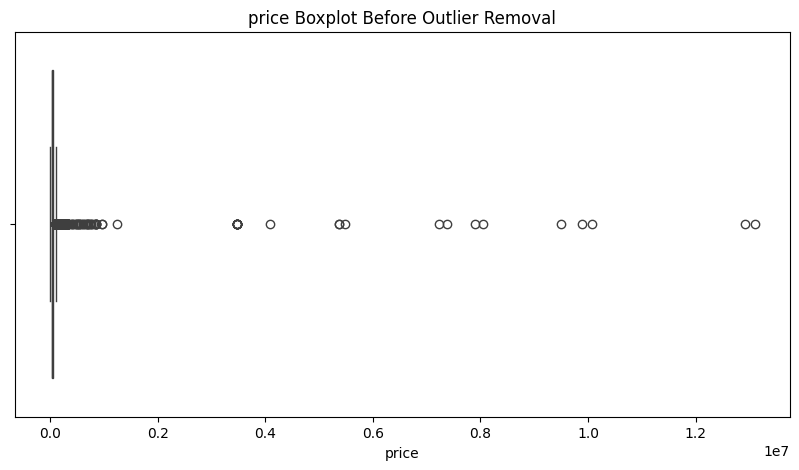

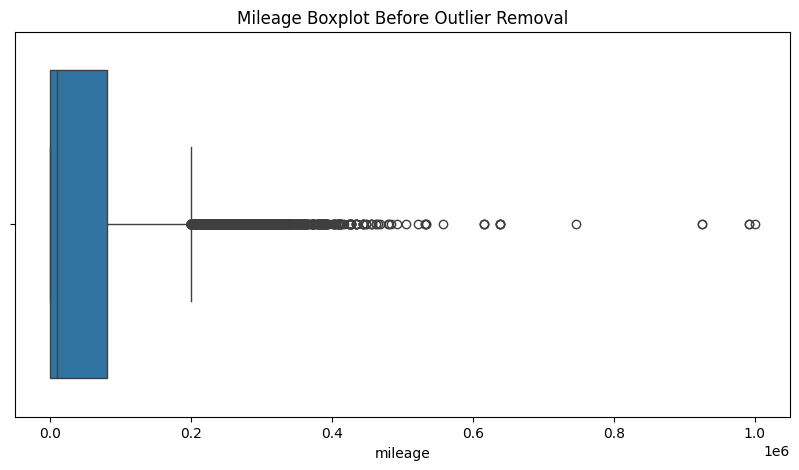

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["price"])
plt.title("price Boxplot Before Outlier Removal")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["mileage"])
plt.title("Mileage Boxplot Before Outlier Removal")
plt.show()

In [ ]:
# Calculate Q1, Q3, and IQR
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define lower and upper bounds for outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify outliers
outliers_price = df['price'][(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)]

# Display the number of outliers
outliers_price_count = len(outliers_price)
print("outliers_price_count:", outliers_price_count)

outliers_price_count 3797


In [ ]:
# Calculate median price using the 'price' column from the dataframe 'df'
median_price = df['price'].median()

# Replace outliers with median
df['price'] = np.where(
    (df['price'] < lower_bound_price) | (df['price'] > upper_bound_price),
    median_price,
    df['price']
)

# Verify if outliers remain after replacement
price_data_after = df['price'].dropna()
outliers_price_after = price_data_after[(price_data_after < lower_bound_price) | (price_data_after > upper_bound_price)]

# Count remaining outliers
remaining_outliers_price = len(outliers_price_after)
print("remaining_outliers_price:", remaining_outliers_price)

remaining_outliers_price: 0


In [ ]:
# Calculate Q1, Q3, and IQR for mileage
Q1_mileage = df['mileage'].quantile(0.25) # Use the 'mileage' column from the dataframe 'df'
Q3_mileage = df['mileage'].quantile(0.75) # Use the 'mileage' column from the dataframe 'df'
IQR_mileage = Q3_mileage - Q1_mileage

# Define lower and upper bounds for outliers
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Identify outliers
outliers_mileage = df['mileage'][(df['mileage'] < lower_bound_mileage) | (df['mileage'] > upper_bound_mileage)] # Use the 'mileage' column from the dataframe 'df'


# Display the number of outliers in mileage
outliers_mileage_count = len(outliers_mileage)
outliers_mileage_count

4060

In [ ]:
# Calculate median mileage using the 'mileage' column from the DataFrame 'df'
median_mileage = df['mileage'].median()

# Replace outliers with median
df['mileage'] = np.where(
    (df['mileage'] < lower_bound_mileage) | (df['mileage'] > upper_bound_mileage),
    median_mileage,
    df['mileage']
)

# Verify if outliers remain after replacement
mileage_data_after = df['mileage'].dropna()
outliers_mileage_after = mileage_data_after[(mileage_data_after < lower_bound_mileage) | (mileage_data_after > upper_bound_mileage)]

# Count remaining outliers in mileage
remaining_outliers_mileage = len(outliers_mileage_after)
remaining_outliers_mileage

0

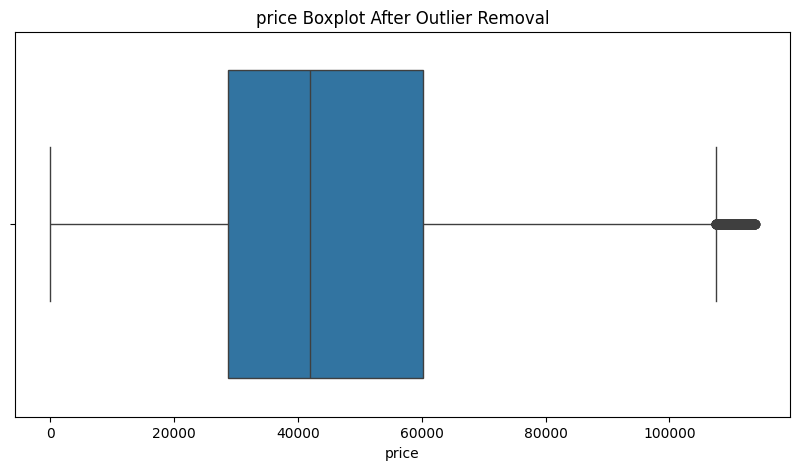

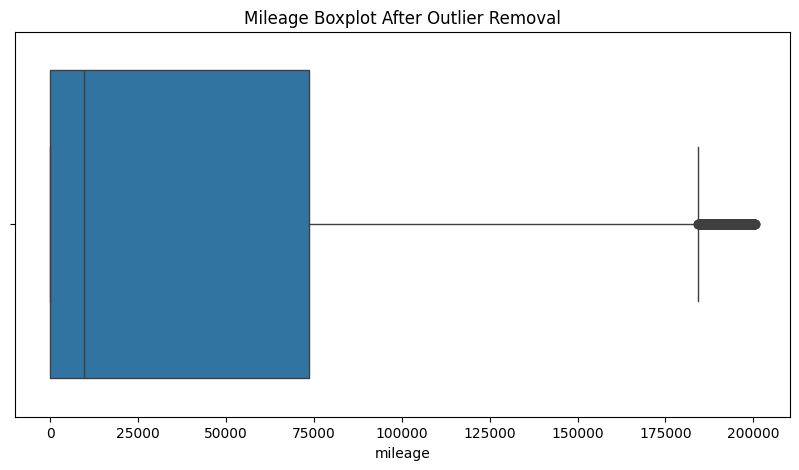

In [ ]:

# Re-check boxplots after outlier removal
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["price"])
plt.title("price Boxplot After Outlier Removal")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["mileage"])
plt.title("Mileage Boxplot After Outlier Removal")
plt.show()



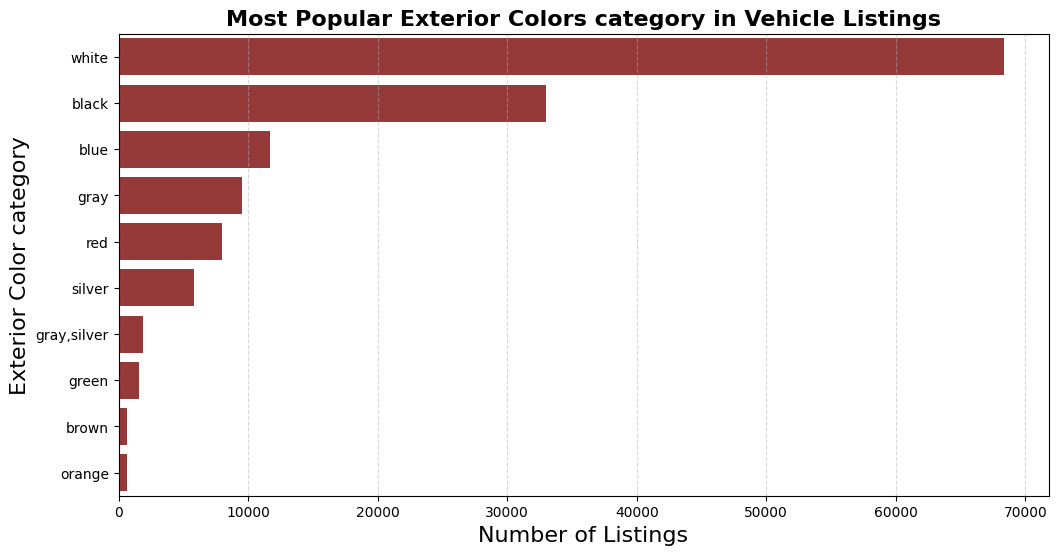

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 3️⃣ Bar Chart: Most Popular Exterior Colors
plt.figure(figsize=(12, 6))
# Add 'Unknown' to the categories of 'exterior_color_category'
if "Unknown" not in df["exterior_color_category"].cat.categories:
    df["exterior_color_category"] = df["exterior_color_category"].cat.add_categories("Unknown")
sns.countplot(y=df["exterior_color_category"].fillna("Unknown"), order=df["exterior_color_category"].value_counts().index[:10], color="brown")
plt.xlabel("Number of Listings",fontsize=16)
plt.ylabel("Exterior Color category",fontsize=16)
plt.title("Most Popular Exterior Colors category in Vehicle Listings",fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

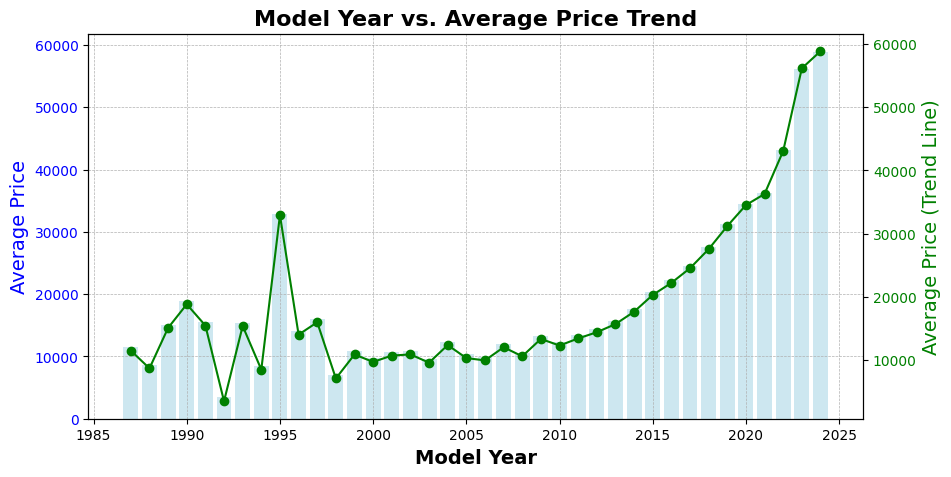

<ipython-input-43-f85c8e646ab6>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mileage = df.groupby("make")["mileage"].mean().sort_values()


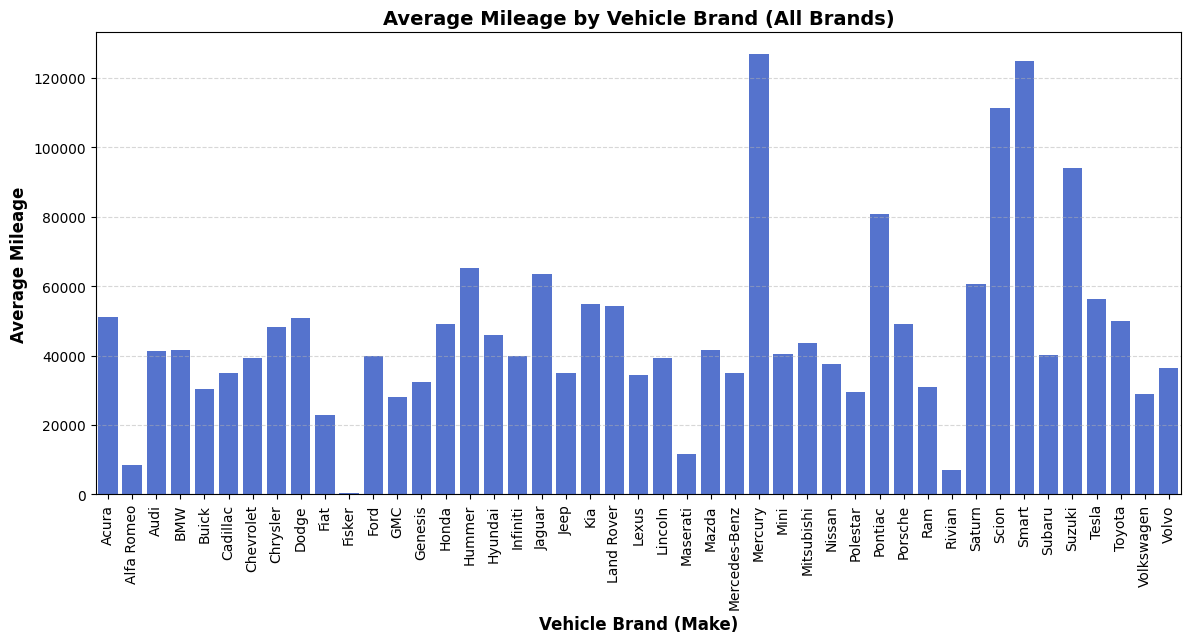

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by model year and calculating average price
model_year_avg_price = df.groupby("model_year")["price"].mean()

# Creating the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Creating the bar chart
ax1.bar(model_year_avg_price.index, model_year_avg_price, color='lightblue', alpha=0.6, label='Average Price')
ax1.set_xlabel("Model Year",fontsize=14, fontweight="bold")
ax1.set_ylabel("Average Price",fontsize=14,color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating the secondary axis for the line chart
ax2 = ax1.twinx()
ax2.plot(model_year_avg_price.index, model_year_avg_price, marker='o', color='green', label='Trend Line')
ax2.set_ylabel("Average Price (Trend Line)",fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title("Model Year vs. Average Price Trend",fontsize=16, fontweight="bold", color="black")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()




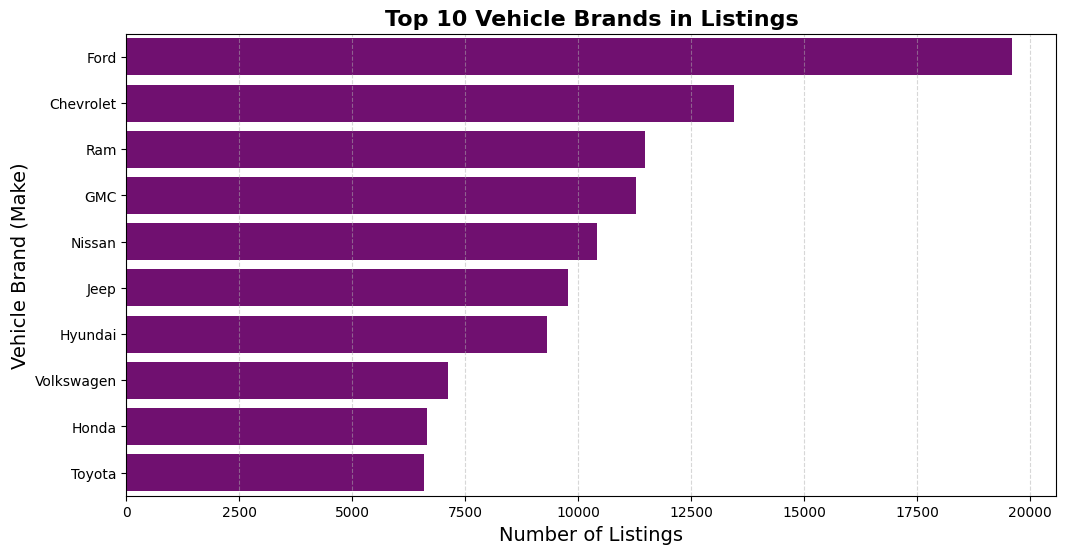

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["make"], order=df["make"].value_counts().index[:10], color="purple")
plt.xlabel("Number of Listings",fontsize=14)
plt.ylabel("Vehicle Brand (Make)",fontsize=14)
plt.title("Top 10 Vehicle Brands in Listings",fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

<ipython-input-48-96a1dc5a4dc8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_days_on_market = df.groupby("make")["days_on_market"].mean().sort_values()


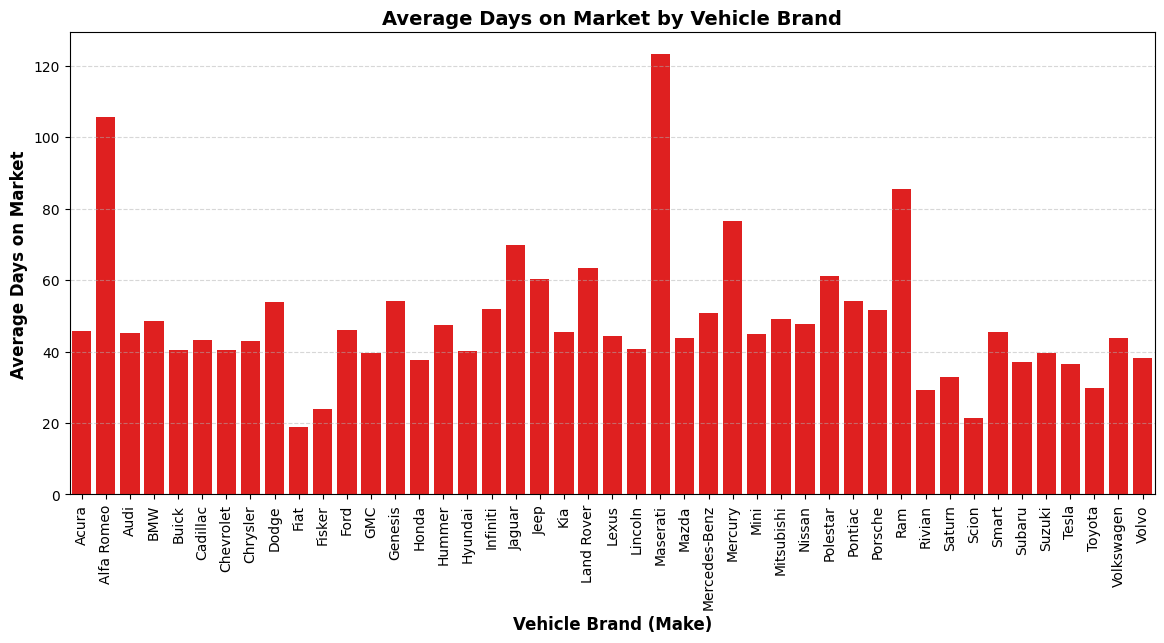

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average days on market per brand (make)
avg_days_on_market = df.groupby("make")["days_on_market"].mean().sort_values()

# Plot bar chart with same color for all bars
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_days_on_market.index, y=avg_days_on_market.values, color="red")  # Uniform color
plt.xlabel("Vehicle Brand (Make)", fontsize=12, fontweight="bold")
plt.ylabel("Average Days on Market", fontsize=12, fontweight="bold")
plt.title("Average Days on Market by Vehicle Brand", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


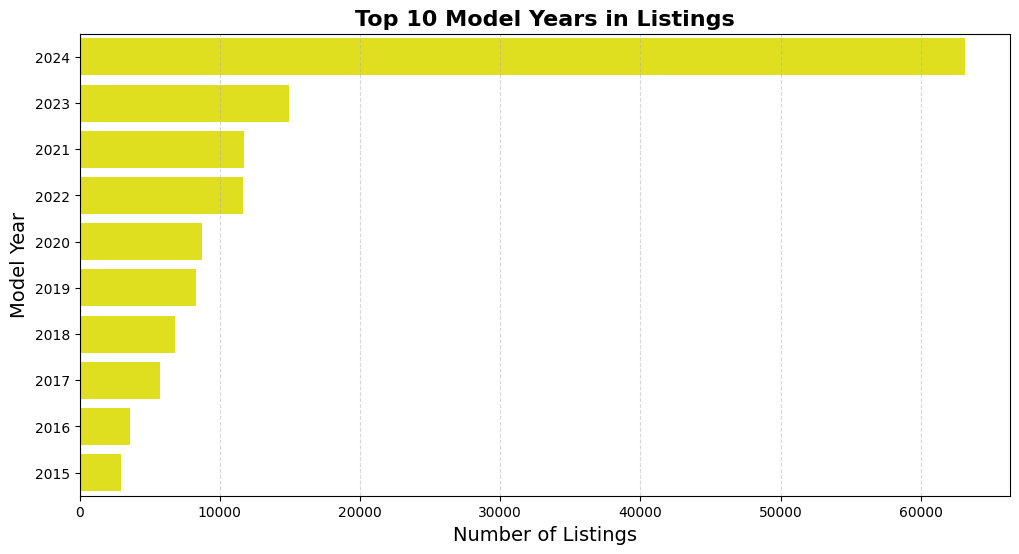

In [ ]:

# Top 10 Model Years in Listings
plt.figure(figsize=(12, 6))
sns.countplot(y=df["model_year"], order=df["model_year"].value_counts().index[:10], color="yellow")
plt.xlabel("Number of Listings",fontsize=14)
plt.ylabel("Model Year",fontsize=14)
plt.title("Top 10 Model Years in Listings",fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

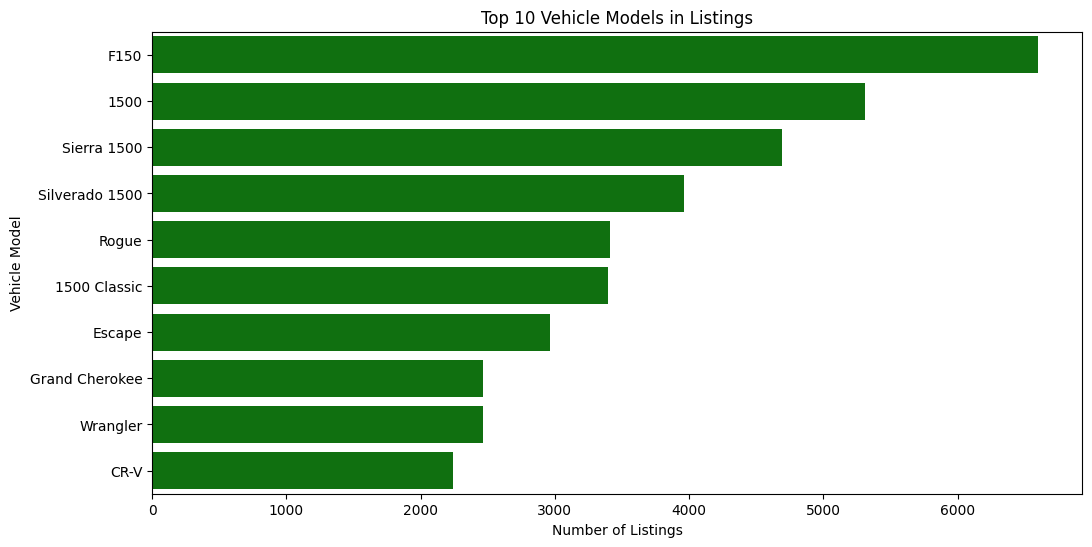

In [ ]:

# Top 10 Vehicle Models in Listings
plt.figure(figsize=(12, 6))
sns.countplot(y=df["model"], order=df["model"].value_counts().index[:10], color="green")
plt.xlabel("Number of Listings")
plt.ylabel("Vehicle Model")
plt.title("Top 10 Vehicle Models in Listings")
plt.show()

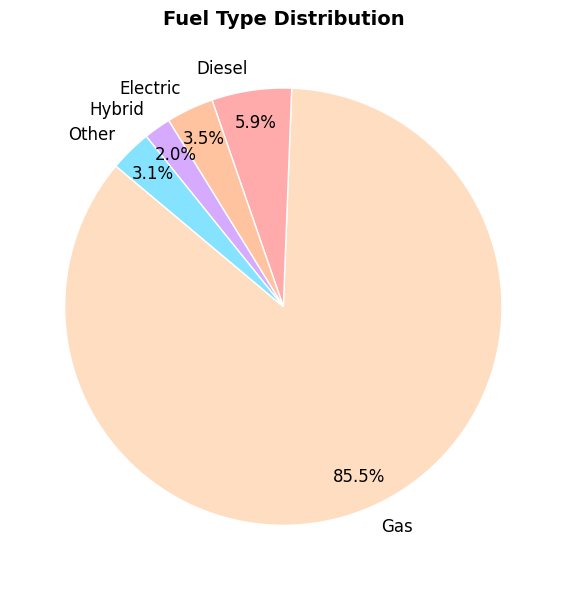

In [ ]:
import matplotlib.pyplot as plt

# Sample data (update with actual values)
labels = ["Gas", "Diesel", "Electric", "Hybrid", "Other"]
sizes = [85.5, 5.9, 3.5, 2.0, 3.1]

# Light pastel colors
colors = ["#FFDDC1", "#FFABAB", "#FFC3A0", "#D5AAFF", "#85E3FF"]

# Create Pie Chart
plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140,
    textprops={'fontsize': 12, 'color': "black"}, pctdistance=0.85, wedgeprops={"edgecolor": "white"}
)

# Add a title
plt.title("Fuel Type Distribution", fontsize=14, fontweight="bold")

# Adjust layout for better spacing
plt.tight_layout()

# Show the chart
plt.show()


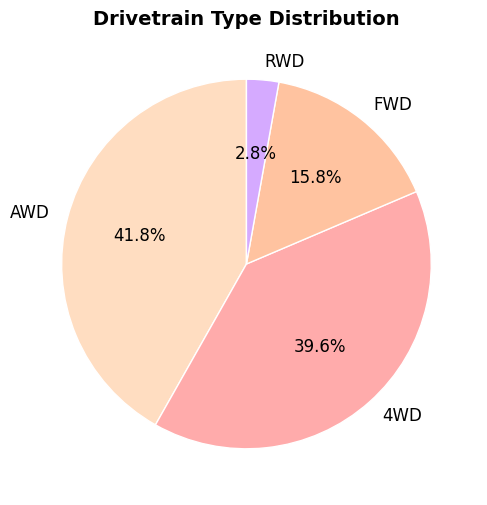

In [ ]:
import matplotlib.pyplot as plt

# Define light pastel colors
colors = ["#FFDDC1", "#FFABAB", "#FFC3A0", "#D5AAFF", "#85E3FF", "#B9FBC0"]

plt.figure(figsize=(6, 6))
df["drivetrain_from_vin"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,  # Apply custom light colors
    wedgeprops={"edgecolor": "white", "linewidth": 1},  # White edges for clarity
    textprops={"fontsize": 12}  # Increase text readability
)
plt.title("Drivetrain Type Distribution", fontsize=14, fontweight="bold")
plt.ylabel("")  # Hide y-label for better aesthetics
plt.show()


In [ ]:
# Re-import necessary libraries after execution state reset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display # Import display function

# Define relevant columns for encoding
columns_to_use = [
    "days_on_market", "stock_type", "mileage", "price", "msrp", "model_year",
    "make", "model", "style", "exterior_color_category", "interior_color_category",
    "price_analysis", "wheelbase_from_vin", "drivetrain_from_vin", "engine_from_vin",
    "transmission_from_vin", "fuel_type_from_vin", "distance_to_dealer"
]

# Keep only relevant columns
df_encoded = df[columns_to_use].copy()

# Convert categorical columns to appropriate data types
categorical_cols = ["stock_type", "make", "model", "style", "exterior_color_category", "interior_color_category",
                    "drivetrain_from_vin", "engine_from_vin", "transmission_from_vin", "fuel_type_from_vin"]

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype(str)

# One-Hot Encoding for 'stock_type' (binary category)
df_encoded = pd.get_dummies(df_encoded, columns=["stock_type"], drop_first=True)

# Label Encoding for categorical features
label_encoders = {}
for col in categorical_cols:
    if col != "stock_type":  # 'stock_type' is already one-hot encoded
        label_encoders[col] = LabelEncoder()
        df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

# Verify the encoding process
display(df_encoded.head(5)) # Displaying the first 5 rows for brevity



,days_on_market,mileage,price,msrp,model_year,make,model,style,exterior_color_category,interior_color_category,price_analysis,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,distance_to_dealer,stock_type_USED
0,9,9726.5,11500.0,0,1987,6,122,22,6,0,0,3026.47299,3,836,2,3,9.84,True
1,4,48905.0,8700.0,0,1988,7,239,114,66,0,0,3026.47299,3,786,2,3,8.30,True
2,54,174640.0,6000.0,0,1989,5,162,114,58,0,0,3026.47299,2,727,2,3,5.71,True
3,338,174640.0,6000.0,0,1989,5,162,114,58,0,0,3026.47299,2,727,2,3,5.71,True
4,10,9726.5,8500.0,0,1989,6,122,22,66,0,0,3026.47299,3,836,2,3,9.84,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   days_on_market           145114 non-null  int64  
 1   mileage                  145114 non-null  float64
 2   price                    145114 non-null  float64
 3   msrp                     145114 non-null  int64  
 4   model_year               145114 non-null  int64  
 5   make                     145114 non-null  int64  
 6   model                    145114 non-null  int64  
 7   style                    145114 non-null  int64  
 8   exterior_color_category  145114 non-null  int64  
 9   interior_color_category  145114 non-null  int64  
 10  price_analysis           145114 non-null  int64  
 11  wheelbase_from_vin       145114 non-null  float64
 12  drivetrain_from_vin      145114 non-null  int64  
 13  engine_from_vin          145114 non-null  int64  
 14  tran

In [ ]:
# Define the desktop path
desktop_path = r"C:\Users\sgurl\OneDrive\Desktop\my_file.csv"

# Save the file
df.to_csv(desktop_path, index=False)

print("CSV file saved to Desktop successfully!")
df.to_csv(desktop_path, index=False)

print("CSV file saved to Desktop successfully!")

CSV file saved to Desktop successfully!
CSV file saved to Desktop successfully!
